<a href="https://colab.research.google.com/github/aartijugdar/XGBOOST/blob/master/ML_allregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('Data (1).csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
print(dataset.head(10))

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
5  26.27  59.44  1012.23  58.77  443.67
6  15.89  43.96  1014.02  75.24  467.35
7   9.48  44.71  1019.12  66.43  478.42
8  14.64  45.00  1021.78  41.25  475.98
9  11.74  43.56  1015.14  70.72  477.50


AT- Ambient Temperature
V - Exhaust Vacuum
AP - ambient pressure
RH - Relative humidity
PE -net hourly electrical energy output (EP) of the plant

In [7]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [8]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [76]:
import seaborn as sns

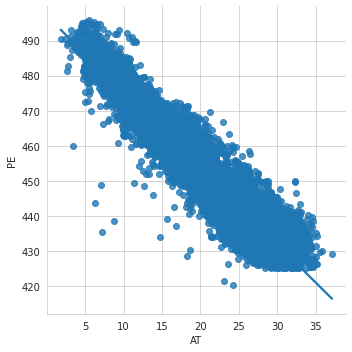

In [77]:
sns.set_style('whitegrid')
sns.lmplot(x ='AT', y ='PE', data = dataset)

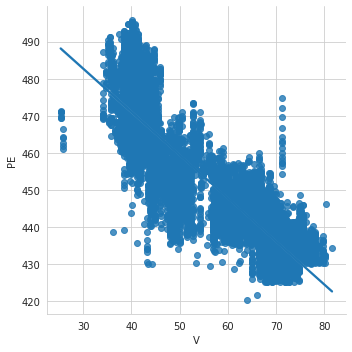

In [78]:
sns.set_style('whitegrid')
sns.lmplot(x ='V', y ='PE', data = dataset)

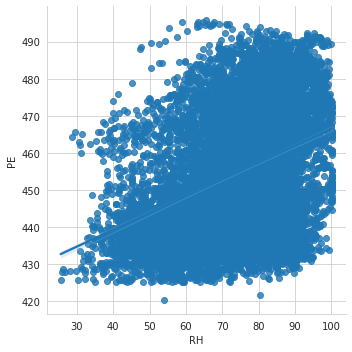

In [79]:
sns.set_style('whitegrid')
sns.lmplot(x ='RH', y ='PE', data = dataset)

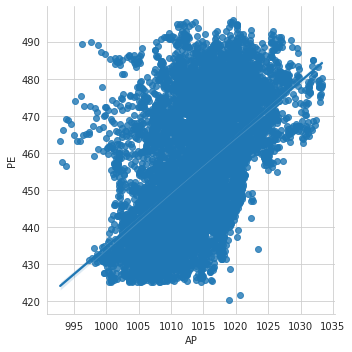

In [80]:
sns.set_style('whitegrid')
sns.lmplot(x ='AP', y ='PE', data = dataset)

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [11]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


## Evaluating the Model Performance

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9325315554761302

Polynomial Regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
polyregressor = LinearRegression()
polyregressor.fit(X_poly, y_train)

LinearRegression()

In [16]:
y_pred_poly = polyregressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_poly.reshape(len(y_pred_poly),1), y_test.reshape(len(y_test),1)),1))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.66 463.28]]


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_poly)

0.9458192606428238

### Decision tree regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

 Predicting the Test set results

In [21]:
dty_pred = dt_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((dty_pred.reshape(len(dty_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


## Evaluating the Model Performance

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, dty_pred)

0.922905874177941

### Random forest 

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

### Predicting the Test set results

In [24]:
rfy_pred = rf_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((rfy_pred.reshape(len(rfy_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [458.79 460.01]
 [463.02 461.14]
 ...
 [469.48 473.26]
 [439.57 438.  ]
 [460.38 463.28]]


## Evaluating model performance


In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, rfy_pred)

0.9615908334363876

## SVM Regressor

# Feature Scaling for SVM 


## reshaping y into 2d array for standard scaler

In [58]:
y = y.reshape(len(y),1)

In [59]:
print(y)

[[463.26]
 [444.37]
 [488.56]
 ...
 [429.57]
 [435.74]
 [453.28]]


In [60]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
print(len(X_tr))

7654


## Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_tr = sc_X.fit_transform(X_tr)
y_tr = sc_y.fit_transform(y_tr)

## Training the SVR model on the Training set

In [63]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel = 'rbf')
svm_regressor.fit(X_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [64]:
print(y_te)

[[431.23]
 [460.01]
 [461.14]
 ...
 [473.26]
 [438.  ]
 [463.28]]


In [68]:
#y1=sc_y.inverse_transform(svm_regressor.predict(sc_X.transform(X_te)))
y1=svm_regressor.predict(sc_X.transform(X_te))

In [69]:
print(y1)

[-1.19  0.21  0.39 ...  0.96 -0.87  0.39]


In [71]:
svmy_pred = sc_y.inverse_transform(y1.reshape(len(y1),1))


In [72]:
print(svmy_pred)

[[434.05]
 [457.94]
 [461.03]
 ...
 [470.6 ]
 [439.42]
 [460.92]]


In [74]:
print(y_te)

[[431.23]
 [460.01]
 [461.14]
 ...
 [473.26]
 [438.  ]
 [463.28]]


## Evaluating model performance

In [75]:
from sklearn.metrics import r2_score
r2_score(y_te, svmy_pred)

0.9480784049986258